In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data_normalized = pd.read_csv('/content/drive/MyDrive/Đồ án 1/Test/data_balanced.csv')
data_normalized

,STT,content,sentiment
0,0,"Hình thức đẹp, còn nguyên màng co. Nội dung th...",0
1,1,Với mỗi tác phẩm của chú Nguyễn Nhật Ánh mình ...,1
2,2,Truyện này của nguyễn nhật ánh khác hẳn với nh...,1
3,3,"Truyện viết nhẹ nhàng, dí dỏm. Ngôn ngữ trong ...",0
4,4,"Mua sách ngay 11/11, hẹn 1 tuần có mà mới 1 ng...",1
...,...,...,...
979,988,"Giấy quá mỏng, chỉ dùng in tạm chứ nếu dùng in...",0
980,989,"Giấy ổn, giao hàng nhanh, đóng gói tiết kiệm, ...",0
981,990,chưa đọc nên không biết ra sao nhưng cảm thấy ...,0
982,991,Truyện thì chưa đọc nên chưa biết nội dung như...,0


In [ ]:
data_normalized = data_normalized.drop('STT', axis = 1)
data_normalized

,content,sentiment
0,"Hình thức đẹp, còn nguyên màng co. Nội dung th...",0
1,Với mỗi tác phẩm của chú Nguyễn Nhật Ánh mình ...,1
2,Truyện này của nguyễn nhật ánh khác hẳn với nh...,1
3,"Truyện viết nhẹ nhàng, dí dỏm. Ngôn ngữ trong ...",0
4,"Mua sách ngay 11/11, hẹn 1 tuần có mà mới 1 ng...",1
...,...,...
979,"Giấy quá mỏng, chỉ dùng in tạm chứ nếu dùng in...",0
980,"Giấy ổn, giao hàng nhanh, đóng gói tiết kiệm, ...",0
981,chưa đọc nên không biết ra sao nhưng cảm thấy ...,0
982,Truyện thì chưa đọc nên chưa biết nội dung như...,0


In [ ]:
data_normalized['sentiment'].unique()

array([ 0,  1, -1])

In [ ]:
data_normalized['sentiment'].value_counts()

-1    334
 0    329
 1    321
Name: sentiment, dtype: int64

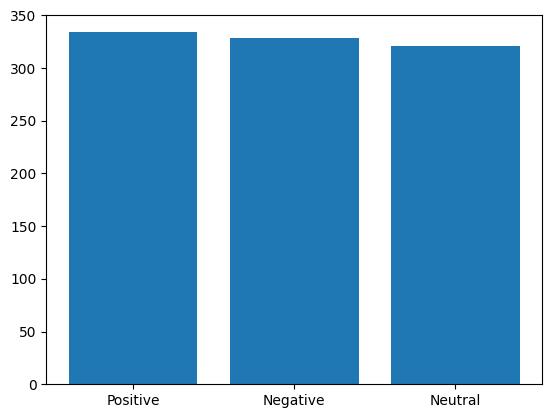

In [ ]:
sentiment = ['Positive', 'Negative', 'Neutral']
counts = data_normalized['sentiment'].value_counts()

plt.bar(sentiment, counts)
plt.show()

In [ ]:
!pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 27.6 MB/s eta 0:00:00


In [ ]:
import re
from pyvi import ViTokenizer
from pyvi import ViUtils

In [ ]:
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
dicchar = loaddicchar()

In [ ]:
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [ ]:
def clean_mess(mess):
  mess_unic = convert_unicode(mess).lower()
  mess_rmspectoken = re.findall(r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ0-9]+\b', mess_unic)
  mess_norm = ' '.join(mess_rmspectoken)

  # Chuẩn hóa kí tự kéo dài
  mess_norm = re.sub(r'([A-Z])\1+', lambda m: m.group(1).lower(), mess_norm, flags = re.IGNORECASE)

  # Chuẩn hóa tiếng việt, thuật ngữ
  replace_list = {
  # Thuật ngữ (teencode) và các từ viết tắt
  # Tập train
  ' na ': u' nguyễn nhật ánh ', ' k ': u' không ', ' bookmark ': u' dấu trang ', ' plot twist ': u' kết thúc bất ngờ ',
  ' twist ': u' kết thúc bất ngờ ', ' kg ': u' không ', ' r ': u' rồi ', ' sx ': u' nhận ', ' ncc ': u' nhà cung cấp ',
  ' giao ship ': u' người giao hàng ', ' mousse ': u' vật liệu bảo vệ sách ', ' qh ': u' quỳnh hương ', ' shipper ': u' người giao hàng ',
  ' tks ': u' cảm ơn', ' ekip ': u' đội ngũ ', u' ngừoi ': u' người ', ' book care ': u' bảo vệ sách ',
  u' tđi ': ' tổng đài ', ' stress ': u' áp lực ', ' highly recommed ': u' rất khuyến khích ', ' xink ': u' xinh ',
  u' tô ': u' tôi ', ' bookcare ': u' bảo vệ sách ', ' hqua ': u' hôm qua ', u' đáng ': u' đánh ', ' touchlit ': u' bút tô màu đặc biệt ',
  ' ncl ': u' nói chung là ',  u' zời ': u' vời ', ' idol ': u' thần tượng ', ' cute ': u' dễ thương ',
  ' shock ': u' xóc ', ' ok ': ' hợp lý ', ' ceo ': u' giám đốc điều hành ', ' vn ': u' việt nam ', ' thanks ': u' cảm ơn ',
  ' review ': u' tóm tắt ', ' pharaoh ': u' hoàng đế ai cập', ' deadline ': u' công việc sắp hết hạn ', u' đc ': u' được ',
  ' ship ': u' giao hàng ', ' comments ': u' các câu bình luận ', u' pé pé ': u' bé bé ', u' hổng ': u' không',
  ' j ': u' gì ', ' ok ': ' đồng ý ',  ' postcard ': u' tấm bìa quảng cáo ', ' ok ': u' ổn ', ' nhma ': u' nhưng mà ',
  ' bonus ': u' thưởng ', ' blah blah ': u' vân vân ', ' tv ': u' ti vi ',  ' e ': u' em ', ' ntn ': u' như thế này ',
  ' nhg ': u' nhưng ', ' nxb ': u' nhà xuất bản ', u' đou ': u' đỡ ', ' cx ': u' cũng ', ' logic ': u' hợp lý ',
  ' dc ': u' được ', ' online ': u' trực tuyến ', u' cám ơn ': u' cảm ơn ', ' nsx ': u' nhà sản xuất ',
  u' sử lí ': u' xử lý ', ' made ': u' đến từ ', ' china ': u' trung quốc ', ' thailand ': u' thái lan ',
  ' tn thpt qg ': u' trắc nghiệm trung học phổ thông quốc gia ', ' table ': u' bảng ', ' max ': u' giá trị lớn nhất ',
  ' min ': u' giá trị nhỏ nhất ', ' sticker ': u' nhãn dán ', ' hn ': ' hà nội ', ' qg ': u' quốc gia ',
  u' hịnn ': ' xịn ', u' mn ': u' mọi người ', u' dethuong gi đau â ': u' dễ thương ', ' speedtest ': u' tốc độ kiểm tra ',
  ' test ': u' kiểm tra ', ' covid 19 ': u' dịch bệnh ', u' sức mạnh mớ ': u' sức mạnh mới ', ' kh ': ' khoa học ',
  ' app ': u' ứng dụng ', ' comment ': ' bình luận ', ' recommend ': u' khuyến khích ', ' mk ': u' mình ',
  u' hơn lag ': u' hơn là ', u' giân hờn ': u' giận hờn ', ' mjh ': u' mình ', ' cop ': u' sao chép ',
  ' to do list ': u' cách quản lý thời gian ', ' mng ': u' mọi người ', ' gg ': u' công cụ tìm kiếm ',
  u' lắm luon ': u' lắm luôn ', 'ỏh ': ' ', ' dethuong ': u' dễ thương ', u' kím ': u' kiếm ', ' , hjx ': ' ',
  ' hk ': ' không ', ' caption ': ' tiêu đề ', u' pải ': u' phải ', ' bt ': u' biết ', ' shop ': u' cửa hàng ',
  ' trend ': u' xu hướng ', ' thgian ': u' thời gian ', ' nv ': ' nhân viên ', ' hk ': ' không ', ' lm ': u' làm ',
  u' cừoi ': u' cười ', ' kon ': u' con ', ' vd ': u' ví dụ ', ' mail ': u' thư điện tử ', ' complain ': u' phàn nàn ',
  ' monh ': u' minh ', ' voucher ': u' phiếu giảm giá ', ' group ': u' nhóm ', ' sale ': u' bán hàng ', ' ndung ': u' nội dung ',
  ' how ': u' làm thế nào ', ' toẹt ': u' tuyệt ', ' seal ': u' đánh dấu ', ' dth ': ' ', ' ms ': u' mới ',
  ' rv ': u' tóm tắt ', ' audio ': u' bản nghe ', ' ebook ': u' sách điện tử ', ' nx ': u' nữa ', ' bt ': u' bài tập ',
  ' thank you so much ': u' cảm ơn rất nhiều ', ' flashcard ': u' thẻ từ vựng ', ' app ': u' ứng dụng ', ' file ': u' tệp ',
  ' perfect ': u' hoàn hảo ', ' note ': u' ghi chú ', ' mn ': u' mọi người ', ' down mood ': u' xuống cảm xúc ',
  ' 1q ': u' một quyển ', ' mood ': u' cảm xúc ', ' google translate ': u' công cụ dịch ', ' đâuf ': u' đầu ',
  ' khách hang ': u' khách hàng ', ' cod ': u' có ', ' cskh ': u' cơ sở khách hàng ', ' youtuber ': u' người sáng tạo video ',
  ' a ': u' anh ', ' trc ': u' trước ', ' best-seller ': u' bán chạy ', ' self-help ': u' hướng dẫn ', ' manga ': u' truyện tranh Nhật Bản ',
  ' standee ': u' bản trưng bày ', ' kout ': u' cao ', ' hong ': u' không ', ' mua nho ': u' mua nha ', ' t7 ': u' thứ bảy ',
  ' cn ': u' chủ nhật ', ' vote ': u' bình chọn ', ' luon ': u' luôn ', ' clg ': u' chất lượng ', ' kute ': u' dễ thương ',
  ' lun ': u' luôn ', ' 4q ': u' bốn quyển ', ' t6 ': u' thứ sáu ', ' 4 q ': u' bốn quyển ', ' p s ': u' tái bút ',
  ' bookcard ': u' thẻ sách ', ' p ': u' phải ', ' o ': u' không ', ' nx ': u' nữa ', ' mạng up ': u' mạng tải lên ',
  ' pre ord ': u' đặt trước ', ' giwof ': u' giờ ', ' thanks ': u' cảm ơn ', ' 2 quyen ': u' hai quyển ', ' mọt ': u' một ',
  ' cta ': u' chúng ta ', ' vs ': u' và ', ' pótcard ': ' bìa quảng cáo ', ' staff ': u' nhân viên ', ' ng ': u' người ',
  ' khong ': u' không ', ' kh ': u' không ', ' siu siu ': u' siêu ', ' check ': u' kiểm tra ', ' h ': u' giờ ',
  u' một bênh ': u' một bên ', u' nê ': u' nên ', ' mik ': u' mình ', ' thank ': u' cảm ơn ', u' khônh ': u' không ',
  ' tki ': u' tiki ', ' oke ': u' tốt ', ' inbox ': u' nhắn tin ', ' sp ': u' sản phẩm ', ' hthuc ': u' hình thức ',
  ' qtrinh ': u' quá trình ', ' onl ': u' trực tuyến ', ' trading ': u' thương mại ', ' mindset ': u' tư duy ',
  ' okie ': u' tốt ', ' bds ': u' bất động sản ', ' sale ': u' giảm giá ', ' p1giải ': u' phần một giải ',
  ' enneagram ': u' hệ thống phân tích tình cảm ', ' p3 ': u' phần ba ', ' p2 ': u' phần hai ', ' mbti ': ' công cụ đo lường tính cách ',
  u' cóa ': u' có ', ' vs ': u' với ', ' notes ': u' chú ý ', ' mjk ': u' mình ', ' tiế rhu ': u' tiếp thu ',
  ' love you ': u' yêu ', ' thank you i love you ': u' cảm ơn yêu ', ' pp ': u' phương pháp ', ' 1cuốn ': u' một cuốn ',
  ' 1cuộc ': u' một cuộc ', ' cammon ': u' cảm ơn ', ' hsg ': u' học sinh giỏi ', ' thpt ': u' trung học phổ thông ',
  ' siêu bưu ': u' to ', ' hk ': u' không ', ' thik ': u' thích ', ' gru ': u' những ', ' e ': u' em ', ' thế flash ': u' nhanh ',
  ' siu ': u' siêu ', ' tg ': u' thời gian ', u' khyên ': u' khuyên ', ' font ': u' phông chữ ', ' iu ': u' yêu ',
  ' order ': u' đặt ', ' series ': u' chuỗi ', ' ny ': u' người yêu ', ' teen girls ': u' các cô gái trẻ ',
  ' weibo ': u' mạng xã hội ', ' ms ': u' mới ', ' ns ': u' nói ', ' fan ': u' người hâm mộ ', ' c ': u' chuyện ',
  ' ch ': u' chuyện ', ' kp ': u' không phải ', ' cg ': u' cũng ', ' little bit hoy ': u' một chút thôi ',
  ' giao hangg ': u' giao hàng ', ' quốn ': u' cuốn ', ' trading ': u' thương mại ', ' ph ': u' phải ', ' km ': u' khuyến mãi ',
  ' best ': u' cực kỳ ', ' scan qr ': u' quét mã vạch ', ' ttck ': u' thị trường chứng khoán ', ' mã qr ': u' mã vạch ',
  ' happy live ': u' sống hạnh phúc ', ' mua cty ': u' mua tích trữ ', ' ticker ': u' nhãn dán ', ' bullet journal ': u' mục tiêu hằng ngày ',
  ' mini ': u' nhỏ ', ' notebook ': u' sổ tay ', ' trade ': u' thương mại ', ' chồi ôi ': u' trời ơi ', ' form ': u' mẫu ',
  ' covid ': u' dịch bệnh ', ' qr code ': u' mã vạch ', ' case ': u' trường hợp ', ' files ': u' tệp ',
  ' youtube ': u' trình phát video ', ' freeship ': u' miễn phí giao hàng ', ' feedback ': u' phản hồi ',
  ' hotline ': u' đường dây nóng ', ' thoy ': u' thôi ', ' ord ': u' đặt hàng ', ' hs ': u' học sinh ',
  ' tphcm ': u' thành phố hồ chí minh ', ' coupon ': u' phiếu giảm giá ', ' zui ': u' vui ', ' tp ': u' tác phẩm ',
  ' j ' : u' gì ', 'nnghi ': u' nghĩ ', ' ôi cha ': u' ôi chao ', u' tân trí ': u' tâm trí ', ' laii ': u' lại ',
  ' kh ' : u' khách hàng', ' uh ': ' ', u' vêc ': u' về ', ' cmt ' : u' bình luận ', ' vứoi ': u' với ',
  ' ngừi ': ' người ', ' âu ': u' đâu ', ' síp ': u' vận chuyển ', ' km ': u' khuyến mãi ', ' kb bnhiu ': u' không biết bao nhiêu ',
  ' best seller ': u' bán chạy nhất ', ' nôiij ': u' nội ', ' bh ': u' bao giờ ', ' rev ': u' tóm tắt ', ' m ': u' mình ',
  ' xog ': u' xong ', ' news feed ': u' bảng tin ', ' like ': u' thích ', ' unbox ': u' mở hộp ', ' nd ': u' nội dung ',
  ' love ': u' yêu ', ' nc ': u' nói chung ', u' đătj ': u' đặt ', u' chuyênh ': u' chuyện ', ' coffee ': u' tiệm cà phê ',
  ' chill ': u' thư thái ', ' vintage ': u' cổ điển ', ' t ': u' tôi ', ' packaching ': u' đóng gói ', ' mt ': u' môi trường ',
  ' th ': u' thì ', ' onl ': u' trực tuyến ', ' best ': u' tốt nhất ', ' sd ': u' sử dụng ', ' de kiu ': u' quá ',
  ' hehe just kidding ': u' đùa thôi ', ' sales ': u' giảm giá ', ' book care ': u' bảo vệ sách ', ' rate ': u' đánh giá ',
  ' pùn ': u' buồn ', 'search ': u' tra cứu ', 'mk ': u' mình ', ' trg ': u' trong ', ' chast ': u' chất ',
  ' keke ': ' ', ' chrome ': ' ', u' ôg ': u' ông ', u' cũg ': u' cũng ', u' tẻ ': u' rẻ ', ' palette ': u' bảng màu ',
  u' đpej ': u' đẹp ', ' rose bengal ': u' hoa hồng ', ' test ': u' kiểm tra ', ' oki ': u' hợp lý ', ' thik ': u' thích ',
  ' delay ': u' chậm trễ ', ' patv ': u' phiên âm tiếng việt ', ' chug ': u' chung ', ' out ': u' văng ',
  u' hỉu ': u' hiểu ', u' viêtd ': u' viết ', ' post card ': u' thẻ sách ', ' th khảo': u' tham khảo ', ' it s easy': u' thật dễ dàng ',
  ' toxic ': u' tiêu cực ', ' clb ': u' câu lạc bộ ', ' diet': u' diệt ', ' ngy ': u' người yêu ', 'rate ': u' đánh giá ',
  ' motif ': u' thể loại ', ' spoil ': u' tiết lộ ', ' adn ': u' gen ', ' hr ': u' người tuyển dụng ', ' nc ': u' nước ',
  ' happy ending ': u' kết thúc có hậu ', u' pạn ': u' bạn ', u'truện ': u'truyện ', ' perfect': u' hoàn hảo ',
  'ship ': 'giao hàng ', ' move your as ': u' chắm chỉ hơn ', ' all ': u' tất cả ', ' lm ': u' làm ', ' ak': u' à ',
  ' keep going on ': u' tiếp tục cố gắng ', ' followers': u' người theo dõi ', ' hq ': u' hôm qua ', ' hn ': u' hôm nay ',
  ' service ': u' dịch vụ ', u' nhìu': u' nhiều ', ' shiper ': u' người giao hàng ', u' đt ': u' điện thoại ',
  'chuc ': u' chúc ', ' bn ': u' bạn ', ' set ': u' bộ ', ' thik': u' thích', ' overated': u' đánh giá cao ',
  ' conf ': u' còn ', u' rùi ': u' rồi ', ' tks ': u' cảm ơn ', ' i ': u' tôi ', ' please forgive me ': u' xin tha thứ ',
  ' p ': ' phương pháp ', ' ths': u' cảm ơn', ' đag ': u' đang ', ' n ': u' nhưng ', ' handmade ': u' làm bằng tay ',
  ' gh ': u' giao hàng ', ' bill ': u' hóa đơn ', u' thâtd ': u' thất ', ' z ': u' vậy ', ' tr ': u' trời ',
  ' v ': u' vậy ', ' self love ': u' yêu bản thân ', u' đợn ': u' đơn ', ' game ': u' trò chơi ',' đuoc ': u' được ',
  ' flash sale ': u' giảm giá mạnh ', ' code ': u' mã ', u' lừi ': u' lời ', u' rì vêu ': u' tóm tắt ',
  # Tập test
  ' plastic ': u' nhựa ', ' band ': u' thang điểm ', ' topic ': u' chủ đề ', u' pảt ': u' phần ', ' download ': u' tải xuống ',
  ' speaking ': u' nói tiếng anh ', ' ielts ': u' chứng chỉ tiếng anh ', ' keys ': u' đáp án ', u' nhiềi ': u' nhiều ',
  ' trươc ': u' trước ', ' mark book': u' dấu trang ', ' tiy ': u' tuy ', ' ad ': u' quản trị viên ', ' backup plan ': u' kế hoạc dự phòng ',
  ' reading ': u' đọc tiếng anh ', ' tips ': u' phương pháp ', ' works ': u' làm việc ', ' nhuw ': u' như ',
  ' meaning ': u' nghĩa ', ' vd ': u' ví dụ ', ' practice ': u' thực hành ', ' thoai': u' thôi ', ' update ': u' cập nhật ',
  ' beginners ': u' người mới ', ' link ': u' liên kết ', ' cảm ơi ': u' cảm ơn ', ' ck ': ' chứng khoán ',
  ' video clip ': u' băng hình ', ' gê ': u' ghê ', ' pt ': u' biết ', u' sướt ': u' xước ', ' refer ': u' trích dẫn ',
  ' t6 ': u' thứ sáu ', ' t4 ': u' thứ tư ', ' cbcv ': u' chiến binh cầu vồng ', ' very god': u' rất tốt ',
  ' nyc ': u' người yêu cũ ', ' mn': u' mọi người', u' rồai ': u' rồi ', 'shop ': u'cửa hàng ', u' mìn ': u' mình ',
  ' post ': u' đăng lên ', ' haiz ': ' ', ' hqua ': u' hôm qua ', ' hnay ': u' hôm nay ', ' vl ': ' ', ' tick ': u' ghi ',
  ' boxset ': u' gói hàng ', ' box ': u' hộp ', 'poscard': u' bìa '
  }

  for k, v in replace_list.items():
    mess_norm = mess_norm.replace(k, v)

  return mess_norm

In [ ]:
data_normalized['content'][0]

'Hình thức đẹp, còn nguyên màng co. Nội dung thì cũng là văn phong của nguyễn nhật ánh trước giờ chứ không mới mẻ đâu. Là mình thì thấy không hay như truyện Quán gò đi lên hay Nữ sinh. Mình sưu tầm và đọc tất cả sách nguyễn nhật ánh nên đáng mua lắm. Đặc biệt có vài câu thơ khá hay. dấu trang đẹp'

In [ ]:
data_normalized['content'] = data_normalized['content'].apply(lambda cmt: clean_mess(cmt))
data_normalized['content']

0      hình thức đẹp còn nguyên màng co nội dung thì ...
1      với mỗi tác phẩm của chú nguyễn nhật ánh mình ...
2      truyện này của nguyễn nhật ánh khác hẳn với nh...
3      truyện viết nhẹ nhàng dí dỏm ngôn ngữ trong sạ...
4      mua sách ngay 11 11 hẹn 1 tuần có mà mới 1 ngà...
                             ...                        
979    giấy quá mỏng chỉ dùng in tạm chứ nếu dùng in ...
980    giấy ổn giao hàng nhanh đóng gói tiết kiệm mỗi...
981    chưa đọc nên không biết ra sao nhưng cảm thấy ...
982    truyện thì chưa đọc nên chưa biết nội dung như...
983    giao hàng nhanh hơn dự kiến chất lượng rất tốt...
Name: content, Length: 984, dtype: object

In [ ]:
for i in range(len(data_normalized)):
  data_normalized['content'][i] = ViTokenizer.tokenize(data_normalized['content'][i])

data_normalized['content']

<ipython-input-15-71ce35b0bcdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_normalized['content'][i] = ViTokenizer.tokenize(data_normalized['content'][i])


0      hình_thức đẹp còn nguyên màng co nội_dung thì ...
1      với mỗi tác_phẩm của chú nguyễn nhật ánh mình ...
2      truyện này của nguyễn nhật ánh khác hẳn với nh...
3      truyện viết nhẹ_nhàng dí_dỏm ngôn_ngữ trong_sạ...
4      mua sách ngay 11 11 hẹn 1 tuần có mà mới 1 ngà...
                             ...                        
979    giấy quá mỏng chỉ dùng in tạm chứ nếu dùng in ...
980    giấy ổn giao hàng nhanh đóng_gói tiết_kiệm mỗi...
981    chưa đọc nên không biết ra sao nhưng cảm_thấy ...
982    truyện thì chưa đọc nên chưa biết nội_dung như...
983    giao hàng nhanh hơn dự_kiến chất_lượng rất tốt...
Name: content, Length: 984, dtype: object

In [ ]:
data_normalized['content'][0]

'hình_thức đẹp còn nguyên màng co nội_dung thì cũng là văn_phong của nguyễn nhật ánh trước giờ chứ không mới_mẻ đâu là mình thì thấy không hay như truyện quán gò đi lên hay nữ_sinh mình sưu_tầm và đọc tất_cả sách nguyễn nhật ánh nên đánh mua lắm đặc_biệt có vài câu_thơ khá hay dấu trang đẹp'

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import pickle
import time

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_normalized['content'], data_normalized['sentiment'], test_size = 0.2, random_state = 42)

In [ ]:
X_train

962    hình_thức 5 vì giấy đẹp bắt_mắt mua cho cháu n...
762    sách bị như vậy_mà có_thể giao được quá tệ lần...
334    mua 3 quyển đóng_gói thì mình nghĩ hộp giấy củ...
889    giao hàng rất chậm nha mọi người mình đặt 1 tu...
529    chất_lượng sách ổn mình đọc qua thấy dễ hiểu v...
                             ...                        
106    sách trình_bày đẹp và đánh đọc tuy_nhiên khâu ...
270    đọc nhiều bình_luận tích_cực nên hôm_nay mình ...
860    chất_lượng sách kém vừa mua 1 ngày đã bong hết...
435    sau khi đọc cuốn này nó giúp mình thay_đổi ít_...
102    hôm thứ năm tôi đặt là thứ hai tuần sau mới có...
Name: content, Length: 787, dtype: object

In [ ]:
X_test

613    sách rất hay nha_nội dug phù_hợp với mọi lứa tuổi
451    nghe cô ngữ_văn nói nên đọc quyển này để trao ...
731    tác_giả có chia_sẻ cách để sống mà ít bệnh hơn...
436    mỗi người nên đầu_tư cho bản_thân mình cuốn sá...
275    sách hay và giúp_ích rất nhiều cho chặng đường...
                             ...                        
292    ấn_tượng đầu_tiên của mình là sách siêu siêu t...
209    sản_phẩm có chất_lượng tuyệt_vời đúng như mô_t...
506    về nội_dung mình không nói tới bởi_vì tác_phẩm...
49     mình đã đọc nhiều cuốn cổ_vũ tinh_thần kiểu nà...
717    cuộn băng_keo khá mỏng không đủ 3m như miêu_tả...
Name: content, Length: 197, dtype: object

# SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['poly', 'linear', 'rbf', 'sigmoid'],
    'degree': [3, 4, 5],
    'gamma': [0.01, 0.1, 1]
}

In [ ]:
# count_vec = CountVectorizer()
# X_train = count_vec.fit_transform(X_train)

In [ ]:
# tfidf_transformer = TfidfTransformer()
# X_train = tfidf_transformer.fit_transform(X_train)

In [ ]:
# X_test = count_vec.transform(X_test)
# X_test = tfidf_transformer.transform(X_test)

In [ ]:
# grid = GridSearchCV(SVC(), parameters, cv = 5, refit = True, verbose = 2)
# grid.fit(X_train, y_train)

In [ ]:
# grid.best_params_

In [ ]:
# grid.best_estimator_

In [ ]:
steps = []
steps.append(('CountVectorizer', CountVectorizer(ngram_range=(1,5) ,max_df=0.5, min_df=5)))
# steps.append(('CountVectorizer', CountVectorizer()))
steps.append(('tfidf', TfidfTransformer(use_idf=False, sublinear_tf = True,norm='l2',smooth_idf=True)))
# steps.append(('tfidf', TfidfTransformer()))
# steps.append(('classifier',  SVC()))
# steps.append(('classifier',  SVC(C = 10, kernel = 'rbf', gamma = 1)))
steps.append(('classifier',  SVC(C = 1, kernel = 'linear')))
# steps.append(('classifier',  LinearSVC(dual=False, tol=1e-3, penalty="l2", loss='squared_hinge')))
clf = Pipeline(steps)
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
report = metrics.classification_report(y_test, y_pred, labels=[1,0,-1], digits=3)

In [ ]:
print('TRAIN',report)
print('Time Train', end - start)

TRAIN               precision    recall  f1-score   support

           1      0.740     0.794     0.766        68
           0      0.600     0.554     0.576        65
          -1      0.703     0.703     0.703        64

    accuracy                          0.685       197
   macro avg      0.681     0.684     0.682       197
weighted avg      0.682     0.685     0.683       197

Time Train 1.0149056911468506


In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))
#print("f1-score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.6852791878172588


In [ ]:
print("f1-score:", metrics.f1_score(y_test, y_pred, average='weighted'))

f1-score: 0.6828685603196889


In [ ]:
%cd /content/drive/MyDrive/Đồ án 1/Test
!ls

/content/drive/MyDrive/Đồ án 1/Test
'Classification 3 label.ipynb'	    'lstm tuner.ipynb'
 data_balanced.csv		     stopwords.txt
 data_normalized.csv		    'Sửa lỗi chính tả.ipynb'
 data_test.csv			     svm.ipynb
 data_train.csv			     svm.pkl
'Đồ án 1 - Nguyễn Quang Minh.docx'   tuner_lstm
'inference svm.ipynb'		    'VD LSTM 3 labels.ipynb'
 lstm.ipynb


In [ ]:
import pickle
# Lưu vào file
with open('svm.pkl', 'wb') as f:
  pickle.dump(clf, f)